In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing Data
cust_acq = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Credit Card Case Study/Customer Acqusition.csv')
repayment = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Credit Card Case Study/Repayment.csv')
spend = pd.read_csv('C:/Users/ACER PC/Desktop/ANALYTIX_LAB/Python Class Notes/Credit Card Case Study/spend.csv')

#### Meta data inspection

In [3]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [4]:
repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [5]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [6]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [7]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [8]:
cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [9]:
#dropping the irrelavent columns:
repayment.drop(columns=['SL No:', 'Unnamed: 4'], inplace=True)
spend.drop(columns=['Sl No:'], inplace = True)
cust_acq.drop(columns=['No'], inplace=True)

In [10]:
#missing value treatment
repayment.dropna(axis=0, inplace=True)

In [11]:
#converting Date columns to 'DateType' format
spend['Month'] = pd.to_datetime(spend.Month, format='%d-%b-%y')
repayment['Month'] = pd.to_datetime(repayment.Month, format='%d-%b-%y')

#Method 2:
#spend['Month']=spend['Month'].apply(lambda x:pd.to_datetime(x))

#### 1(a) In case age is less than 18, replace it with mean of age values.

In [12]:
cust_acq.loc[cust_acq.Age<18, 'Age'] = cust_acq.Age.mean()

In [13]:
#np.where(cust_acq.Age<18, cust_acq.Age.mean(), cust_acq.Age )

#### 1(b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [14]:
#merging cust_acq and spend data:
cust_spend = pd.merge(left = cust_acq, right = spend, on='Customer' )

In [15]:
cust_spend.loc[cust_spend.Amount>cust_spend.Limit, 'Amount'] = cust_spend.Limit*0.5

In [16]:
#np.where
#cust_spend['Amount']=np.where(cust_spend.Amount>cust_spend.Limit, cust_spend.Limit/2, cust_spend.Amount)

#### 1(c) Incase the repayment amount is more than the limit, replace the repayment with the limit

In [17]:
#merging the cust_acq and repayment data:
cust_repayment = pd.merge(left = cust_acq, right = repayment, on='Customer' )

In [18]:
cust_repayment.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02


In [19]:
cust_repayment.loc[cust_repayment.Amount > cust_repayment.Limit, 'Amount'] = cust_repayment.Limit

In [20]:
#Using np.where()
#cust_repayment['Amount']=np.where(cust_repayment.Amount > cust_repayment.Limit, cust_repayment.Limit, cust_repayment.Amount)

#### 2(a) How many distinct customers exist?

In [21]:
print('Number of Distinct Customers are:', cust_acq.Customer.nunique())

Number of Distinct Customers are: 100


#### 2(b) How many distinct categories exist?

In [22]:
#With the given dataset, there are multiple distinct categories we can explain with respect to customers
#1) no. of distinct Segments
dist_segments = cust_acq.Segment.nunique()
print("Number of Distinct Segments are:", dist_segments)

print("--------------------------------------------------")

#2) no. of distinct Products offered to the Customers:
dist_products = cust_acq.Product.nunique()
print("Number of Distinct Products are:", dist_products)

print("--------------------------------------------------")

#3) no. of distinct Cities from where customer belongs:
dist_cities = cust_acq.City.nunique()
print("Number of Distinct Cities are:", dist_cities)

print("--------------------------------------------------")

#4) distinct categories in terms of spending habits
dist_spending = spend.Type.nunique()
print("Number of Distinct Spending Habits are:", dist_spending)

print("--------------------------------------------------")

#5) no. of distinct Companies where customers work/employed
dist_companies = cust_acq.Company.nunique()
print("Number of Distinct Companies are:", dist_companies)

Number of Distinct Segments are: 5
--------------------------------------------------
Number of Distinct Products are: 3
--------------------------------------------------
Number of Distinct Cities are: 8
--------------------------------------------------
Number of Distinct Spending Habits are: 15
--------------------------------------------------
Number of Distinct Companies are: 41


#### 2(c) What is the average monthly spend by customers?

In [23]:
#creating a new column "month_num" and "year" which will show the month number and year respecively
spend['month_num'] = spend.Month.dt.month
spend['year'] = spend.Month.dt.year

In [24]:
#Method 1: For getting the avg monthly spend as per year
avg_spend_new = round(spend.groupby(pd.PeriodIndex(spend['Month'], freq='M'))['Amount'].mean().reset_index(), 2)
avg_spend_new

,Month,Amount
0,2004-01,251712.07
1,2004-02,221215.27
2,2004-03,232146.12
3,2004-04,235272.04
4,2004-05,217539.24
5,2004-09,310923.38
6,2004-11,270486.40
7,2005-01,292741.37
8,2005-02,229802.28
9,2005-04,252181.33


In [25]:
#Method 2: For getting the avg monthly spend as per year (this gives NaN Value where the data for particular month is not available)
avg_spend_new1 = round(pd.DataFrame(spend.resample('M', on = 'Month').Amount.mean()),2)
avg_spend_new1

,Amount
Month,
2004-01-31,251712.07
2004-02-29,221215.27
2004-03-31,232146.12
2004-04-30,235272.04
2004-05-31,217539.24
2004-06-30,NaN
2004-07-31,NaN
2004-08-31,NaN
2004-09-30,310923.38


In [26]:
#3rd Method
#average monthly spend by customers
average_monthly_spend = round(pd.DataFrame(spend.groupby('month_num').Amount.mean()),2)
average_monthly_spend

,Amount
month_num,
1,256221.13
2,233037.22
3,246255.78
4,236671.85
5,241277.02
6,241329.18
7,268042.29
8,236056.33
9,219369.89


#### 2(d) What is the average monthly repayment by customers?

In [27]:
#1st Method
#Average Monthly repayment by customers for each year
avg_repayment_new = round(repayment.groupby(pd.PeriodIndex(repayment['Month'], freq='M'))['Amount'].mean().reset_index(), 2)

In [28]:
avg_repayment_new

,Month,Amount
0,2004-01,243489.65
1,2004-02,256702.63
2,2004-03,252585.28
3,2004-04,259141.68
4,2004-05,226162.72
5,2004-09,184487.85
6,2004-11,209592.24
7,2005-01,240548.10
8,2005-02,238829.27
9,2005-04,212688.63


#### 2(e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [31]:
#Monthly Profit = Monthly repayment – Monthly spend
monthly_repayment = round(repayment.groupby(pd.PeriodIndex(repayment['Month'], freq='M'))['Amount'].sum().reset_index(), 2)
monthly_spend = round(spend.groupby(pd.PeriodIndex(spend['Month'], freq='M'))['Amount'].sum().reset_index(), 2)
monthly_profit = monthly_repayment.Amount - monthly_spend.Amount

In [32]:
#renaming Amount columns before merging datas:
monthly_repayment.rename(columns= {'Amount': 'repayment_amt'}, inplace=True)
monthly_spend.rename(columns={'Amount': 'spend_amt'}, inplace=True)

In [33]:
bank_profit = pd.merge(left=monthly_repayment, right=monthly_spend, on='Month')

In [34]:
bank_profit['monthly_profit'] = bank_profit.repayment_amt - bank_profit.spend_amt

In [35]:
bank_profit['interest_earned'] = np.where(bank_profit.monthly_profit>0, bank_profit.monthly_profit*0.029, 0)
bank_profit.head()

,Month,repayment_amt,spend_amt,monthly_profit,interest_earned
0,2004-01,68177101.94,77275605.08,-9098503.14,0.00000
1,2004-02,6930971.03,6194027.56,736943.47,21371.36063
2,2004-03,3788779.21,3250045.67,538733.54,15623.27266
3,2004-04,7774250.37,6587617.04,1186633.33,34412.36657
4,2004-05,5654068.02,3045549.31,2608518.71,75647.04259


In [36]:
#Monthly interest earned by the bank which is nothing but the profit/income earned by the bank
bank_profit.loc[bank_profit.interest_earned>0, ['Month','interest_earned']]

,Month,interest_earned
1,2004-02,21371.36063
2,2004-03,15623.27266
3,2004-04,34412.36657
4,2004-05,75647.04259
8,2005-02,2423.18026
10,2005-05,177956.25221
13,2005-08,93941.85586
14,2005-09,9601.18109
17,2005-12,51605.76651
19,2006-02,12558.33661


#### 2(f) What are the top 5 product types?

In [37]:
spend_by_type = spend.groupby('Type').Amount.sum().sort_values(ascending = False).reset_index()
Top_5 = spend_by_type.loc[:4]
Top_5

,Type,Amount
0,PETRO,49863174.09
1,CAMERA,41481571.96
2,FOOD,37773338.43
3,TRAIN TICKET,33067077.15
4,AIR TICKET,32955445.42


#### 2(g) Which city is having maximum spend?

In [38]:
spend_by_cities = cust_spend.groupby('City').Amount.sum().sort_values(ascending = False).reset_index()
max_spend_city = spend_by_cities.loc[0, :]
max_spend_city

City          COCHIN
Amount    45963513.5
Name: 0, dtype: object

#### 2(h) Which age group is spending more money?

In [39]:
cust_spend['Age_Group']=np.where((cust_spend.Age.astype(int) >= 18) & (cust_spend.Age.astype(int) <=25), 'Youth', 
                                 np.where((cust_spend.Age.astype(int) > 25) & (cust_spend.Age.astype(int) <=50), 'Adult', 'Senior'))

In [40]:
spend_by_Age_category = round(cust_spend.groupby('Age_Group').Amount.sum().sort_values(ascending = False),1)

In [41]:
spend_by_Age_category = spend_by_Age_category.reset_index()
spend_by_Age_category

,Age_Group,Amount
0,Adult,122637376.4
1,Senior,72713511.6
2,Youth,24430197.3


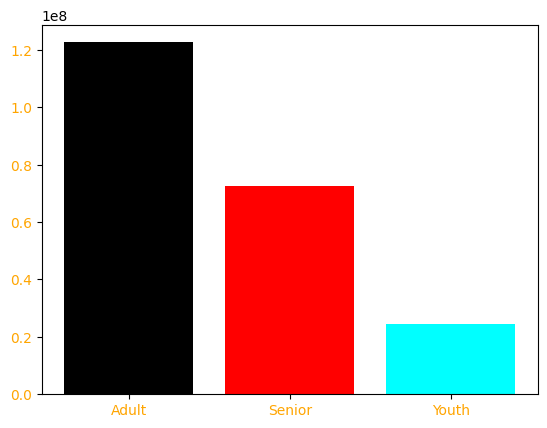

In [42]:
# Choose the names of the bars
bars = ('Adult', 'Senior', 'Youth')
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, spend_by_Age_category.Amount, color=['black', 'red', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars, color='orange')
plt.yticks(color='orange')

# Show graph
plt.show()

#### Observation:
    It can be clearly seen that Adult age groups are spending more money which is quite obvious since they belong to the working class category.

#### 2(i) Who are the top 10 customers in terms of repayment?

In [43]:
#Top 10 customers in terms of repayment amount
repayment.groupby('Customer').Amount.sum().reset_index().sort_values(by='Amount', ascending = False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
15,A22,9372561.68
14,A21,9056336.15
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
43,A48,8292416.75
6,A14,7943268.63


In [44]:
#Top 10 customers in terms of repayment count
repayment.groupby('Customer').Amount.count().reset_index().sort_values(by='Amount', ascending = False).head(10)

,Customer,Amount
58,A61,38
57,A60,38
14,A21,33
15,A22,33
41,A46,31
39,A44,31
38,A43,31
37,A42,31
36,A41,31
35,A40,31


#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [45]:
cust_spend['Year'] = cust_spend.Month.dt.strftime('%Y')

In [46]:
City_wise_spend = pd.crosstab(columns = cust_spend.Product,
                  index = [cust_spend.Year,cust_spend.City], values= cust_spend.Amount, aggfunc= sum)
City_wise_spend

Product                 Gold    Platimum      Silver
Year City                                           
2004 BANGALORE    9289878.54  1112732.30  1291852.58
     BOMBAY       6987853.53   897264.94   532089.03
     CALCUTTA     7477140.98  2037690.30   500006.00
     CHENNAI      1059618.50  3535652.38   282056.86
     COCHIN       7315850.15  3419904.07   814229.62
     DELHI        2806495.00   283512.89   768172.30
     PATNA        2072567.90  1113069.60   756684.10
     TRIVANDRUM   2415102.84  2161676.67   209667.48
2005 BANGALORE   12892362.99   912284.97   830612.34
     BOMBAY       8983018.28   711804.94   508988.54
     CALCUTTA    10303355.80  4434696.31   440147.06
     CHENNAI      3740945.58  5053956.32   377184.49
     COCHIN      12110613.03  4960921.71   652269.38
     DELHI        1964845.27   494157.86   612311.21
     PATNA        3252615.77  2883231.07   950094.19
     TRIVANDRUM   1240375.85  3601443.30   269912.99
2006 BANGALORE   12030611.09   685831.27  1415480.94
     BOMBAY       7917144.31   972130.01  1092833.80
     CALCUTTA    11167532.77  3589606.66  1157956.42
     CHENNAI      2704288.62  5024923.40   350009.50
     COCHIN      10499142.38  4920592.29  1269990.87
     DELHI        2957103.32   176788.72   854899.97
     PATNA        2276181.69  1256137.65   700005.00
     TRIVANDRUM   2735710.87  2147403.75   555862.12

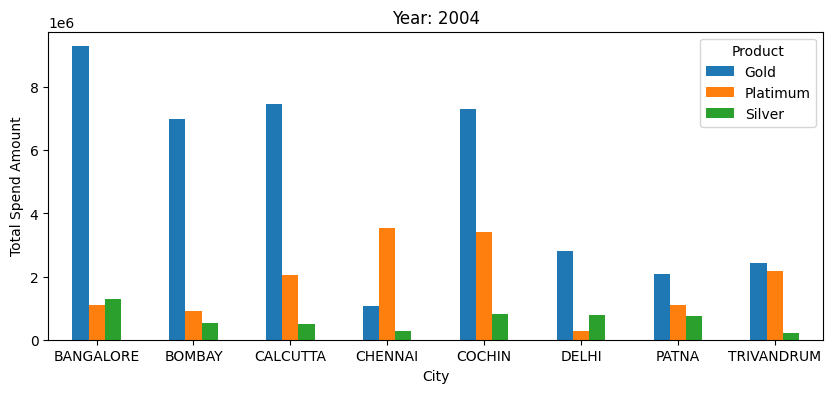

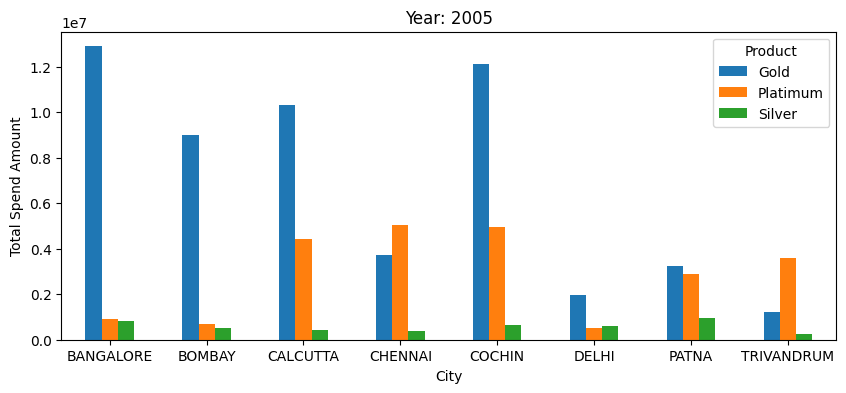

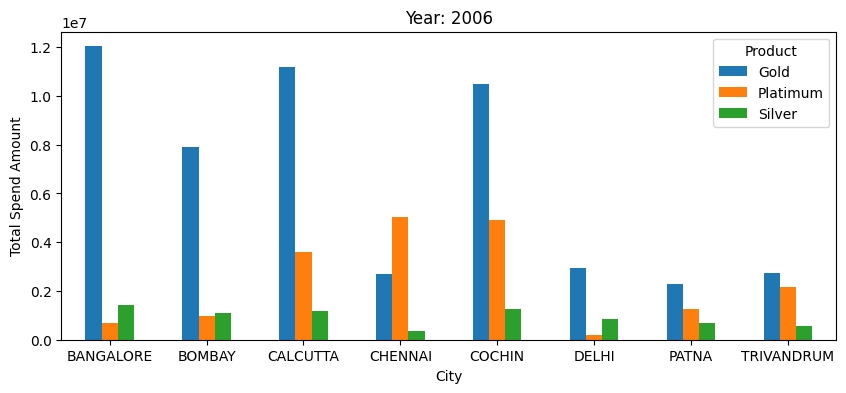

In [47]:
#Plotting the data

years = City_wise_spend.index.get_level_values("Year").unique()

for year in years:
    year_data = City_wise_spend.loc[year]
    x = year_data.plot(kind="bar", rot=0, figsize = (10,4))
    x.set_xlabel("City")
    x.set_ylabel("Total Spend Amount")
    x.set_title(f"Year: {year}")
    x.legend(title="Product")

plt.show()

#### 4. Create graphs for
####    a. Monthly comparison of total spends, city wise

In [48]:
cust_spend['Month_name'] = cust_spend.Month.dt.strftime('%b')

In [49]:
monthly_spend_citywise = pd.crosstab(index = cust_spend.Month_name, columns= cust_spend.City, 
                                values= cust_spend.Amount, aggfunc= sum)
monthly_spend_citywise

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Month_name,,,,,,,,
Apr,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
Aug,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
Dec,422167.24,140040.71,55001.50,223628.27,909533.05,842342.02,50000.00,640922.26
Feb,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
Jan,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
Jul,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
Jun,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
Mar,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
May,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48


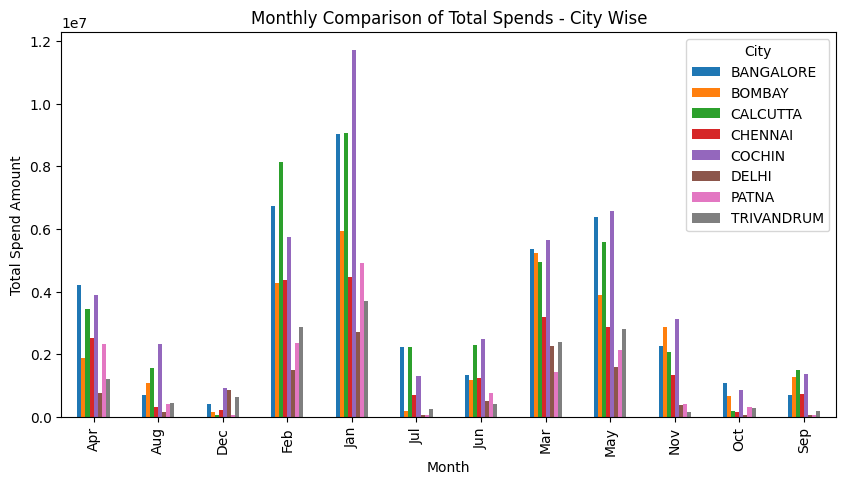

In [50]:
# create plot
monthly_spend_citywise.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Comparison of Total Spends - City Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='City', loc = 'upper right')
plt.show()

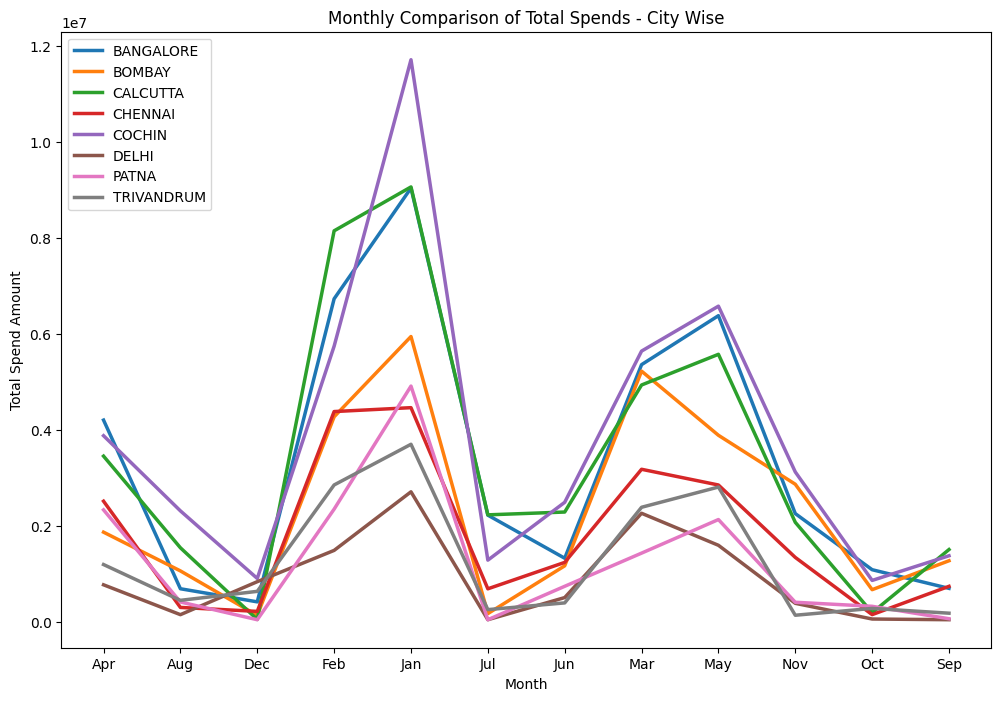

In [51]:
#Line plot
plt.figure( figsize = (12, 8) )
plt.title('Monthly Comparison of Total Spends - City Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.BANGALORE, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.BOMBAY, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.CALCUTTA, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.CHENNAI, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.COCHIN, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.DELHI, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.PATNA, linewidth = 2.5)
plt.plot(monthly_spend_citywise.index, monthly_spend_citywise.TRIVANDRUM, linewidth = 2.5)
plt.legend(['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM'], loc = 'upper left' )
plt.show()

In [52]:
#Some additional analysis:

#Total Spend by Month
monthly_spend_citywise.sum(axis=1).sort_values(ascending=False)

Month_name
Jan    51571793.96
Feb    36000252.50
May    31841036.26
Mar    30455215.99
Apr    20255389.10
Nov    12635988.51
Jun    10194112.96
Jul     6985726.35
Aug     6961903.04
Sep     5927531.59
Oct     3668499.92
Dec     3283635.05
dtype: float64

In [53]:
#Total Spend by City
monthly_spend_citywise.sum(axis=0).sort_values(ascending=False)

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
dtype: float64

##### Observations:
1) Seasonality in the Spend: Total credit card spends are high in the first five months of the year (i.e. from Jan to May). From June onwards there is a continuous declining trend in the spend amount with a minor increase in the month of 'November'.
2) Highest Spend Month being January with a total spend of Rs 51571793.96 and Lowest Spend Month being December with a total spend of Rs 3283635.05
3) City with Highest Total Spend being "COCHIN" with a total spend of Rs 45963513.50 and Lowest Spend being DELHI with a total spend of Rs 10918286.54
4) From the above line plot we can see that total spend amount is consistently high over the months in case of city "COCHIN" as compared to other cities.

#### b. Comparison of yearly spend on air tickets

In [54]:
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,Year,Month_name
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Senior,2004,Jan
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Senior,2004,Jan
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Senior,2004,Jan
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Senior,2004,Jan
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Senior,2005,Jan


In [55]:
# filter records that contains only Type: AIR TICKET
Air_Ticket_Data = cust_spend[cust_spend.Type == 'AIR TICKET']
Air_Ticket_Data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,Year,Month_name
9,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,Senior,2006,Apr
63,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-03,AIR TICKET,5001.00,Senior,2006,Mar
80,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,2006-04-03,AIR TICKET,50000.00,Senior,2006,Apr
97,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2006-05-03,AIR TICKET,50000.50,Adult,2006,May
115,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,2006-06-03,AIR TICKET,50001.00,Senior,2006,Jun


In [56]:
yearly_air_ticket_data = Air_Ticket_Data.groupby('Year').Amount.sum()
yearly_air_ticket_data

Year
2004     4357225.35
2005    10550152.21
2006     5248469.56
Name: Amount, dtype: float64

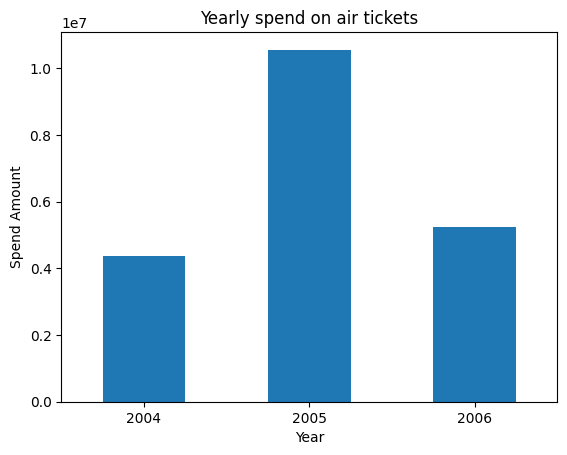

In [80]:
# bar plot:
yearly_air_ticket_data.plot(kind = 'bar')
plt.title('Yearly spend on air tickets')
plt.ylabel('Spend Amount')
plt.xticks(rotation = 0)
plt.show()

##### Observations:
1) Yearly spend on Air Tickets were highest in the year 2005 with a total amount of Rs 10550152.21 whereas spend were recorded lowest in the year 2004

####  C. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [58]:
Product_monthly_spend = pd.crosstab(index = cust_spend.Month_name, columns= cust_spend.Product, 
                                values= cust_spend.Amount, aggfunc= sum)
Product_monthly_spend

Product,Gold,Platimum,Silver
Month_name,,,
Apr,13170572.59,5182493.86,1902322.65
Aug,4954030.42,1714762.80,293109.82
Dec,2332940.96,750156.19,200537.90
Feb,24779179.55,9134054.58,2087018.37
Jan,32413831.83,14951578.51,4206383.62
Jul,5167416.37,1288156.26,530153.72
Jun,6538862.64,2965712.71,689537.61
Mar,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


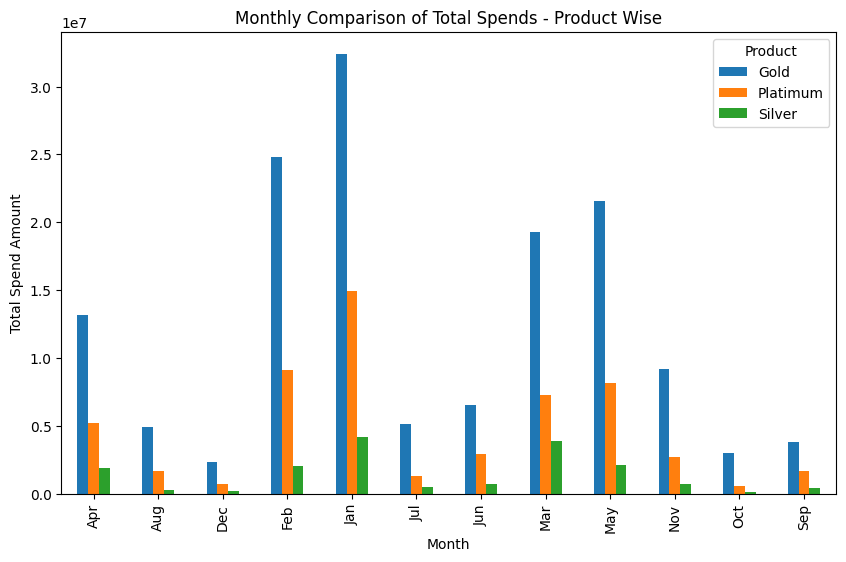

In [59]:
Product_monthly_spend.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Comparison of Total Spends - Product Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='Product')
plt.show()

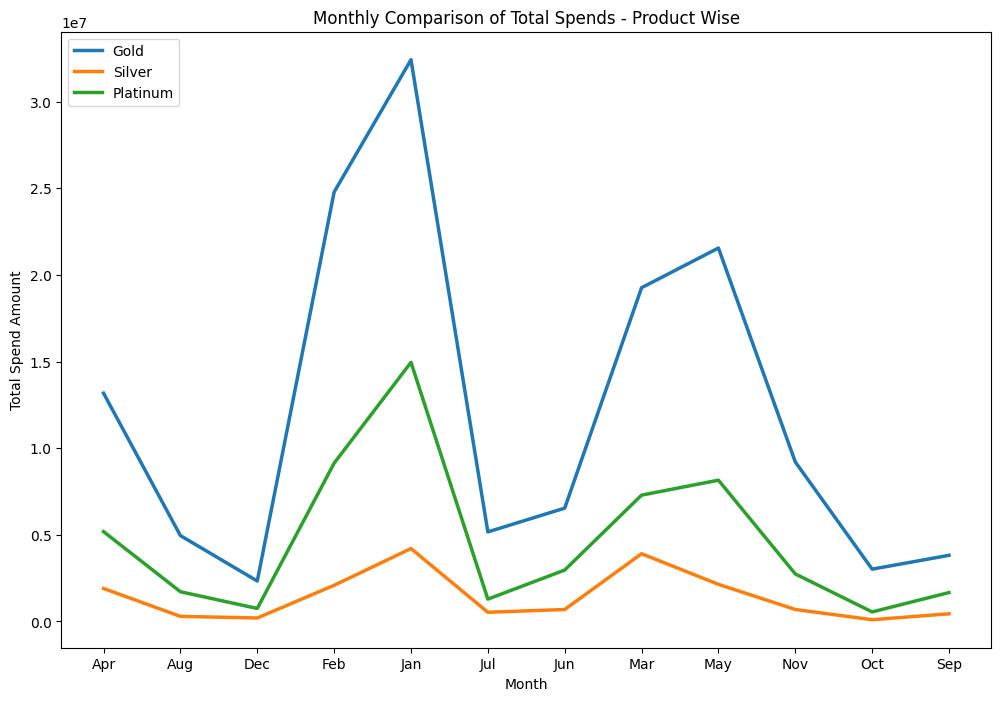

In [60]:
#Line plot
plt.figure( figsize = (12, 8) )
plt.title('Monthly Comparison of Total Spends - Product Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.plot(Product_monthly_spend.index, Product_monthly_spend.Gold, linewidth = 2.5)
plt.plot(Product_monthly_spend.index, Product_monthly_spend.Silver, linewidth = 2.5)
plt.plot(Product_monthly_spend.index, Product_monthly_spend.Platimum, linewidth = 2.5)
plt.legend(['Gold', 'Silver', 'Platinum'], loc = 'upper left' )
plt.show()

In [61]:
#Some additional analysis:

#Total Spend by Month
Product_monthly_spend.sum(axis=1).sort_values(ascending=False)

Month_name
Jan    51571793.96
Feb    36000252.50
May    31841036.26
Mar    30455215.99
Apr    20255389.10
Nov    12635988.51
Jun    10194112.96
Jul     6985726.35
Aug     6961903.04
Sep     5927531.59
Oct     3668499.92
Dec     3283635.05
dtype: float64

In [62]:
#Total Spend by Product
round(Product_monthly_spend.sum(axis=0).sort_values(ascending=False),1)

Product
Gold        146200355.1
Platimum     56387413.4
Silver       17193316.8
dtype: float64

##### Observations:
1) Total credit card spends are high for all the Products in the first five months of the year (i.e. from Jan to May). From June onwards there is a continuous declining trend in the spend amount with a minor increase in the month of 'November'.
2) Product with Highest Total Spend being "Gold" with a total spend of Rs 146200355.1 and Lowest Spend being "Silver" with a total spend of Rs 17193316.8
3) From the above line plot we can see that total spend amount is consistently high over the months in case of "GOLD" Customers as compared to other two Product categories. Customers belonging to "Silver" Category are the lowest spenders.
4) Presence of Seasonality in the trend: The line chart shows a bell curve from January to June in case of all the products which shows the presence of seasonality.

#### 5. Write user defined PYTHON function to perform the following analysis:
    You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [63]:
cust_repayment['Month_name'] = cust_repayment.Month.dt.strftime('%b')
cust_repayment['Month_num'] = cust_repayment.Month.dt.strftime('%m').astype('int')
cust_repayment['Year'] = cust_repayment.Month.dt.strftime('%Y')

In [77]:
# input variable
time_period = input("Please Enter Time Period in year/month (eg. Year = 2005 or Month = Jan): ")

# and doing a little preprocessing for prod_cat 
prod_cat = str(input("Please Enter Product either in Gold/Silver/Platinum:")).lower().strip()

N = 10

def top10Customers(prod_cat,time_period):
    return cust_repayment.loc[(cust_repayment['Product'].str.lower()==prod_cat)
                                    &(
                                        (cust_repayment.Month_name == time_period)
                                        |(cust_repayment.Year == time_period)
                                    )].groupby(['Product','City', 'Customer']).apply(lambda x: x.sort_values(by='Amount',ascending=False).head(N))[['Amount']].reset_index(level=3, drop=True)


Please Enter Time Period in year/month (eg. Year = 2005 or Month = Jan): 2005
Please Enter Product either in Gold/Silver/Platinum:Gold


In [78]:
top10Customers(prod_cat,time_period)

Amount
Product City       Customer           
Gold    BANGALORE  A1        402099.78
                   A1        365366.62
                   A1        297176.74
                   A1        187398.64
                   A1        165972.88
...                                ...
        TRIVANDRUM A28       400330.36
                   A28       360059.59
                   A28       207864.32
                   A28        76099.18
                   A28        15573.54

[191 rows x 1 columns]

##### -------------------------------------------------------------------------------------Thank You---------------------------------------------------------------------------------------------------